## TensorFlow 3 - 2D Wave Propagation

In this example (taken from the [TensorFlow website](https://www.tensorflow.org/versions/r0.7/tutorials/pdes/index.html)),
we perform parallel evaluation of a 2d wave equation. 

In [80]:
import tensorflow as tf
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

In [81]:
def display_array(data, data_range=(0,1)):
    scaled_data = (data - data_range[0])/float(data_range[1] - data_range[0])*255
    scaled_data = np.clip(scaled_data, 0, 255)
    plt.imshow(data, cmap='Greys_r')

Now we set up the calculation.  We're going to have a 2d grid of x and y values, and Z a map from those onto the complex plane:

In [82]:
sess = tf.InteractiveSession()

And now we set these up as tensorflow variables:

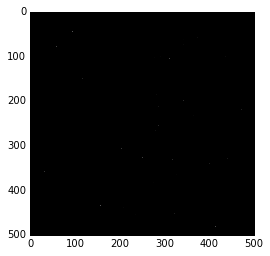

In [83]:
# Initial Conditions -- some rain drops hit a pond
N = 200

# Set everything to zero
u_init = np.zeros((N, N), dtype=np.float32)
ut_init = np.zeros((N, N), dtype=np.float32)

# Some rain drops hit a pond at random points
for n in range(40):
    a, b = np.random.randint(0, N, 2)
    u_init[a,b] = np.random.uniform()

display_array(u_init)

In [76]:
def make_kernel(a):
    """Transform a 2D array into a convolution kernel"""
    a = np.asarray(a)
    a = a.reshape(list(a.shape) + [1,1])
    return tf.constant(a, dtype=1)

def simple_conv(x, k):
    """A simplified 2D stencil operat"""
    x = tf.expand_dims(tf.expand_dims(x, 0), -1)
    y = tf.nn.depthwise_conv2d(x, k, [1, 1, 1, 1], padding='SAME')
    return y[0, :, :, 0]

def laplace(x):
    """Compute the 2D laplacian of an array"""
    laplace_k = make_kernel([[0.5, 1.0, 0.5],
                             [1.0, -6., 1.0],
                             [0.5, 1.0, 0.5]])
    return simple_conv(x, laplace_k)

In [84]:
# Parameters:
# eps -- time resolution
# damping -- wave damping
eps = tf.placeholder(tf.float32, shape=())
damping = tf.placeholder(tf.float32, shape=())

# Create variables for simulation state
U  = tf.Variable(u_init)
Ut = tf.Variable(ut_init)

# Discretized PDE update rules
U_ = U + eps * Ut
Ut_ = Ut + eps * (laplace(U) - damping * Ut)

# Operation to update the state
step = tf.group(
  U.assign(U_),
  Ut.assign(Ut_))

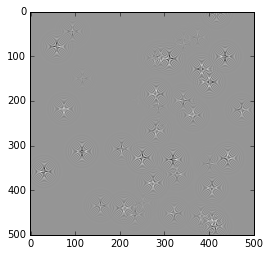

In [87]:
# Initialize state to initial conditions
tf.initialize_all_variables().run()

# Run 1000 steps of PDE
for i in range(1000):
  # Step simulation
  step.run({eps: 0.03, damping: 0.04})
  # Visualize every 50 steps
  if i % 50 == 0:
    display_array(U.eval())

In [88]:
sess.close()